In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

_Create dataframe and import data from csv file_

In [16]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


_Convert the data type of the “rate” column to float and remove the denominator._

In [17]:
def handleRate(value):
	value=str(value).split('/')
	value=value[0];
	return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


*Summary of the data frame:*

In [18]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


_There is no NULL value in dataframe._

/tmp/ipykernel_4145/1280602857.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe['listed_in(type)'], palette="bright")  # Using a Seaborn palette like 'viridis'


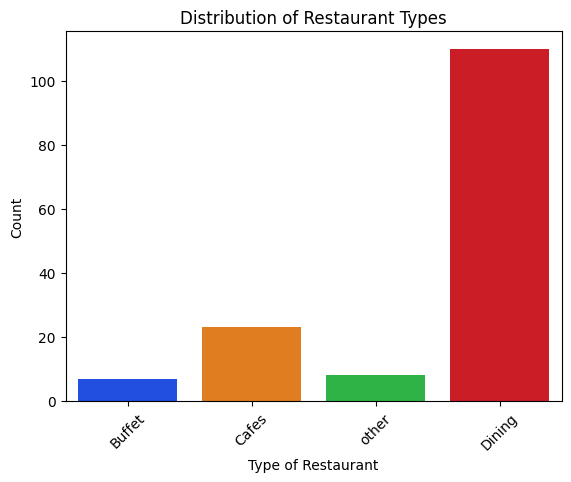

In [32]:
sns.countplot(x=dataframe['listed_in(type)'], palette="bright")  # Using a Seaborn palette like 'viridis'
plt.xlabel("Type of Restaurant")
plt.ylabel("Count")
plt.title("Distribution of Restaurant Types")
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.show()

*CONCLUSION: The majority of the restaurants fall into the dining category.*

Text(0, 0.5, 'Votes')

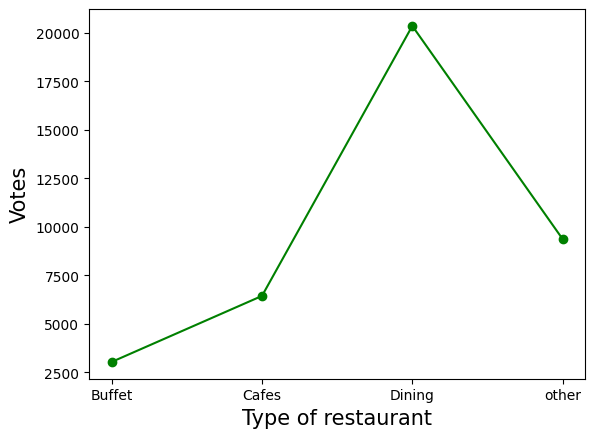

In [20]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="Black", size=15)
plt.ylabel("Votes", c="Black", size=15)

_CONCLUSION: Dining restaurants are preferred by a larger number of individuals._

_Determining the restaurant’s name that received the maximum votes based on a given dataframe._

In [21]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


_Exploring the online_order column._

<Axes: xlabel='online_order', ylabel='count'>

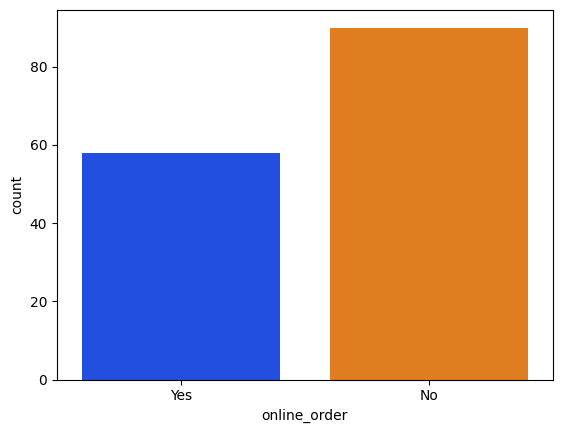

In [14]:
sns.countplot(data=dataframe, x='online_order', hue='online_order', palette="bright", dodge=False)

_CONCLUSION: This suggests that a majority of the restaurants do not accept online orders._

_Exploring the rate column._

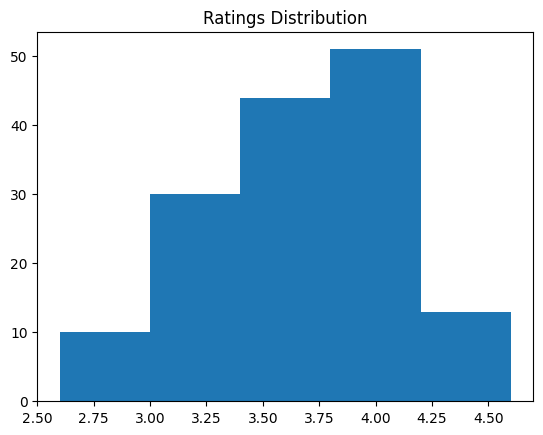

In [22]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

_CONCLUSION: The majority of restaurants received ratings ranging from 3.5 to 4._

_Exploring the approx_cost(for two people) column._

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

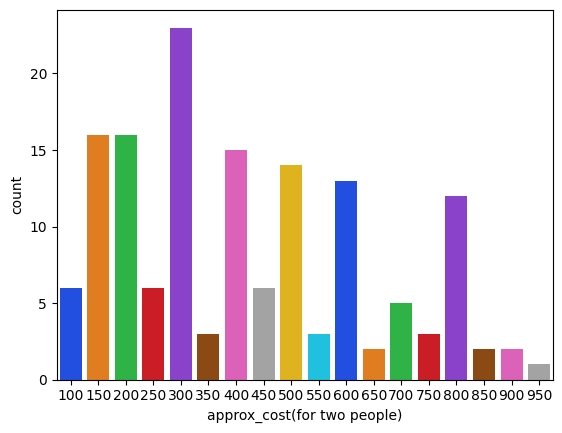

In [25]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data, hue=couple_data, palette="bright", dodge=False,legend=False)

_CONCLUSION: The majority of couples prefer restaurants with an approximate cost of 300 rupees._

_Examining whether online orders receive higher ratings than offline orders._

<Axes: xlabel='online_order', ylabel='rate'>

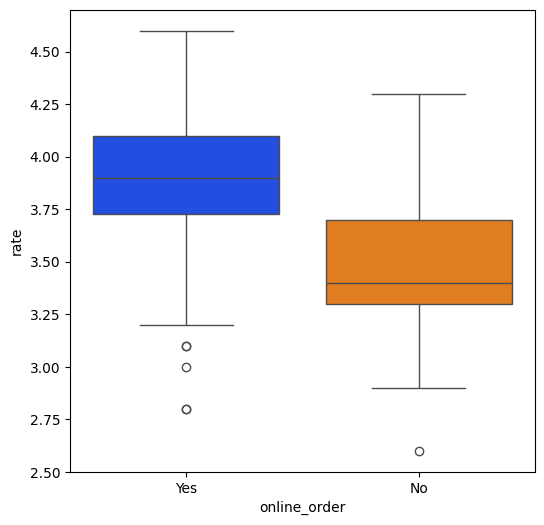

In [29]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe, hue='online_order', palette="bright", legend=False)

_CONCLUSION: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings._

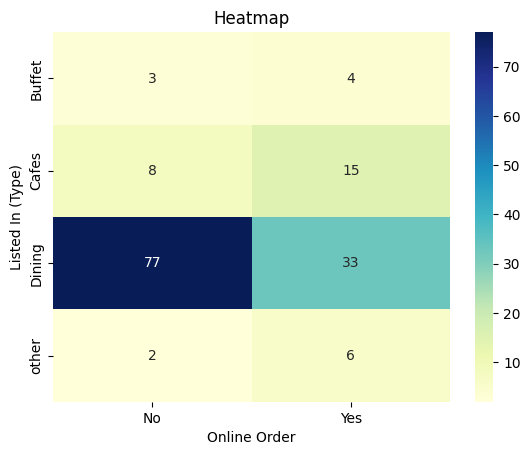

In [30]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

_CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes._